In [140]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D
import numpy as np
from glob import glob
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import itertools

In [141]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'cell_images/Train'
valid_path = 'cell_images/Test'

In [142]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

mobilnet = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [143]:
# don't train existing weights
for layer in mobilnet.layers:
    layer.trainable = False

In [144]:
  # useful for getting number of output classes
folders = glob('../input/malaria-dataset/Dataset/Train/*')

In [145]:
folders

['../input/malaria-dataset/Dataset/Train/Uninfected',
 '../input/malaria-dataset/Dataset/Train/Parasite']

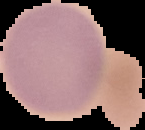

In [146]:
img = Image. open("../input/malaria-dataset/Dataset/Test/Uninfected/2.png")
img

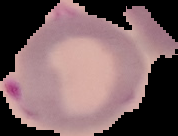

In [147]:
img = Image. open("../input/malaria-dataset/Dataset/Test/Parasite/C39P4thinF_original_IMG_20150622_105554_cell_15.png")
img

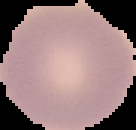

In [148]:
img = Image. open("../input/malaria-dataset/Dataset/Train/Uninfected/C1_thinF_IMG_20150604_104722_cell_191.png")
img

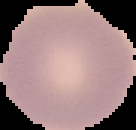

In [149]:
img = Image. open("../input/malaria-dataset/Dataset/Train/Uninfected/C1_thinF_IMG_20150604_104722_cell_191.png")
img

In [150]:
# our layers - you can add more if you want
x = Flatten()(mobilnet.output)

In [151]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=mobilnet.input, outputs=prediction)

In [152]:
# view the structure of the model
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [153]:
### Create Model from scratch using CNN
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 224, 224, 16)      208       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 112, 112, 32)      2080      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 56, 56, 64)        8256      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 28, 28, 64)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 50176)            

In [154]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [155]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [156]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('../input/malaria-dataset/Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 416 images belonging to 2 classes.


In [157]:
training_set

In [158]:
test_set = test_datagen.flow_from_directory('../input/malaria-dataset/Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [159]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=100,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/100
13/13 [==============================] - 6s 425ms/step - loss: 2.5931 - accuracy: 0.5048 - val_loss: 1.4528 - val_accuracy: 0.3209
Epoch 2/100
13/13 [==============================] - 5s 366ms/step - loss: 0.7895 - accuracy: 0.4639 - val_loss: 0.7085 - val_accuracy: 0.4328
Epoch 3/100
13/13 [==============================] - 5s 371ms/step - loss: 0.6731 - accuracy: 0.5817 - val_loss: 0.6855 - val_accuracy: 0.5000
Epoch 4/100
13/13 [==============================] - 5s 364ms/step - loss: 0.6527 - accuracy: 0.6298 - val_loss: 0.7974 - val_accuracy: 0.4104
Epoch 5/100
13/13 [==============================] - 5s 377ms/step - loss: 0.6157 - accuracy: 0.6635 - val_loss: 0.6791 - val_accuracy: 0.4925
Epoch 6/100
13/13 [==============================] - 5s 394ms/step - loss: 0.5442 - accuracy: 0.6995 - val_loss: 0.9232 - val_accuracy: 0.4254
Epoch 7/100
13/13 [==============================] - 5s 382ms/step - loss: 0.5156 - accuracy: 0.7428 - val_loss: 1.2394 - val_accuracy: 0.3881

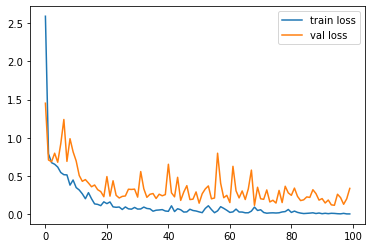

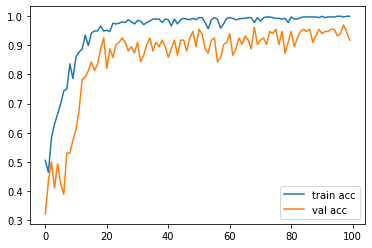

<Figure size 432x288 with 0 Axes>

In [160]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [161]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model.h5')

Confusion Matrix
[[53 38]
 [27 16]]


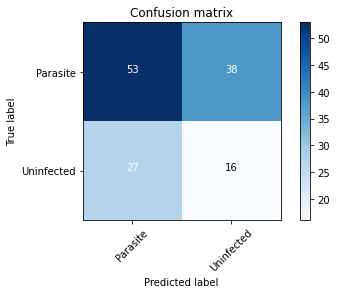

In [162]:
# plot the confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools
from sklearn.metrics import classification_report, confusion_matrix

Y_pred = model.predict_generator(test_set, len(test_set))
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_set.classes, y_pred))
target_names = ['Parasite', 'Uninfected']
# visualize the confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show() 

# visualize the confusion matrix
plot_confusion_matrix(confusion_matrix(test_set.classes, y_pred), target_names)


In [163]:
# visualize the confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show() 